# Importing Libraries

In [2]:
!pip install nlp_utils


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 2.8 MB/s eta 0:00:0000:01


In [3]:
!pip install contractions


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.0 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 13.5 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import nltk
import string
import nlp_utils
import contractions #to remove shortcuts like i'll
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Reading File

In [5]:
df = pd.read_csv('/kaggle/input/toxic-comments/train.csv')

# Data Exploration

In [6]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [7]:
df.shape

(159571, 8)

In [8]:
df.info() #we dont have nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


# Data Analysis

**1) Toxic comments Percentage**

In [9]:
toxic = df['toxic'].value_counts()
toxic

toxic
0    144277
1     15294
Name: count, dtype: int64

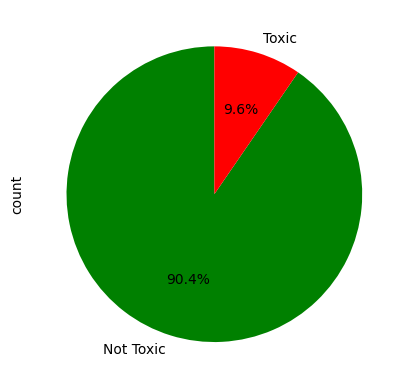

In [10]:
df['toxic'].value_counts().plot.pie(labels=['Not Toxic','Toxic'], autopct='%1.1f%%',colors=['g','r'],startangle=90)
plt.show()

**2) Severe Toxic Comments Percentage**

In [11]:
severe_toxic = df['severe_toxic'].value_counts()
severe_toxic

severe_toxic
0    157976
1      1595
Name: count, dtype: int64

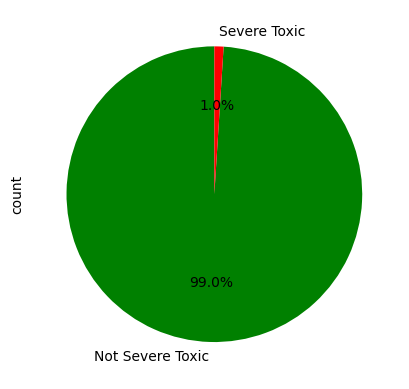

In [12]:
df['severe_toxic'].value_counts().plot.pie(labels=['Not Severe Toxic','Severe Toxic'], autopct='%1.1f%%',colors=['g','r'],startangle=90)
plt.show()

**3) Obscene Comments Percentage**

In [13]:
obscene = df['obscene'].value_counts()
obscene

obscene
0    151122
1      8449
Name: count, dtype: int64

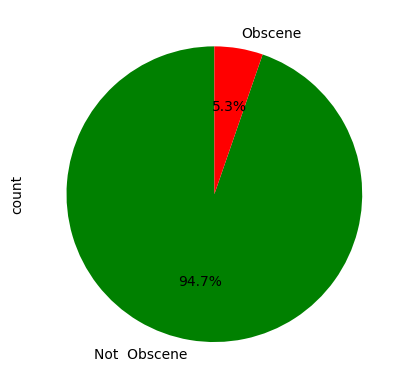

In [14]:
df['obscene'].value_counts().plot.pie(labels=['Not  Obscene','Obscene'], autopct='%1.1f%%',colors=['g','r'],startangle=90)
plt.show()

**4) Threat Comments Percentage**

In [15]:
threat= df['threat'].value_counts() 
threat

threat
0    159093
1       478
Name: count, dtype: int64

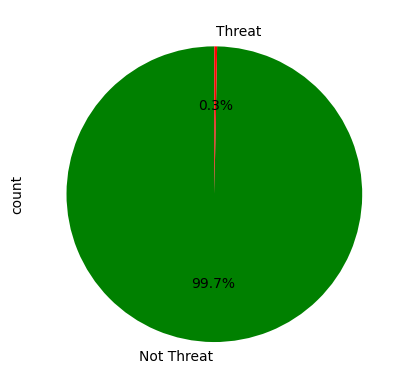

In [16]:
df['threat'].value_counts().plot.pie(labels=['Not Threat','Threat'], autopct='%1.1f%%',colors=['g','r'],startangle=90)
plt.show()

**5) Insult  Comments Percentage**

In [17]:
insult= df['insult'].value_counts()              
insult

insult
0    151694
1      7877
Name: count, dtype: int64

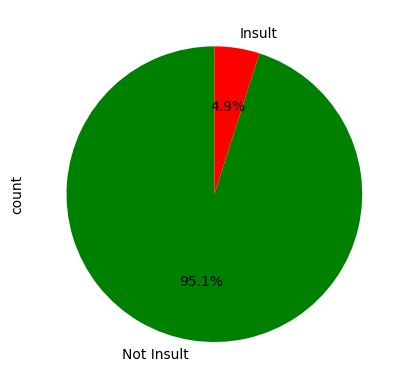

In [18]:
df['insult'].value_counts().plot.pie(labels=['Not Insult','Insult'], autopct='%1.1f%%',colors=['g','r'],startangle=90)
plt.show()

**6) Identity hate Comments Percentage**

In [19]:
identity_hate = df['identity_hate'].value_counts()          
identity_hate

identity_hate
0    158166
1      1405
Name: count, dtype: int64

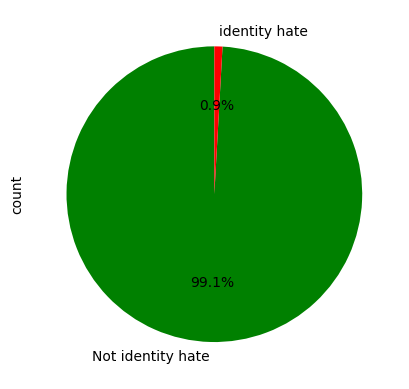

In [20]:
df['identity_hate'].value_counts().plot.pie(labels=['Not identity hate','identity hate'], autopct='%1.1f%%',colors=['g','r'],startangle=90)
plt.show()

**7) Let's see all negative Comments Percentage**

In [21]:
negative_comments = ((toxic[1] + severe_toxic[1] + obscene[1] + threat[1] + insult[1] + identity_hate[1]) / 159571)*100
normal_comments = (100 - negative_comments)
print(f"{negative_comments:.2f}%")
print(f"{normal_comments:.2f}%")

22.00%
78.00%


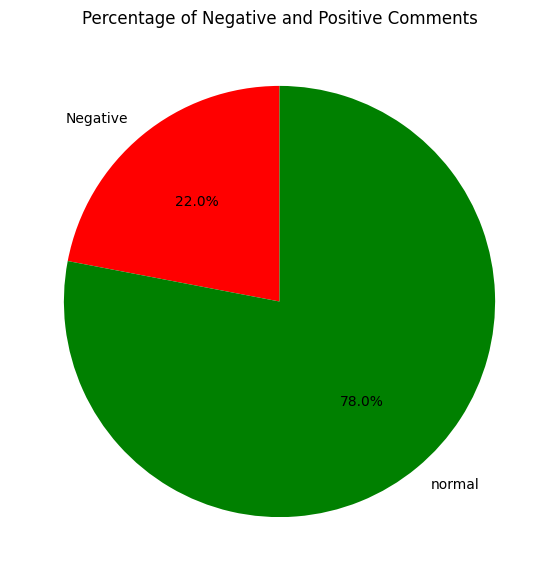

In [22]:
labels = ['Negative', 'normal']
percentages = [negative_comments, normal_comments]

plt.figure(figsize=(7, 7))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90,colors=["r",'g'])
plt.title('Percentage of Negative and Positive Comments')
plt.show()

# Text Pre_processing

In [23]:


def clean_text(text):
    alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
    punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
    remove_n = lambda x: re.sub("\n", " ", x)
    remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)
    
    text = alphanumeric(text)
    text = punc_lower(text)
    text = remove_n(text)
    text = remove_non_ascii(text)
    
    return text



In [24]:
df['comment_text'] = df['comment_text'].apply(clean_text)


In [25]:
df['comment_text']

0         explanation why the edits made under my userna...
1         d aww  he matches this background colour i m s...
2         hey man  i m really not trying to edit war  it...
3           more i can t make any real suggestions on im...
4         you  sir  are my hero  any chance you remember...
                                ...                        
159566          and for the second time of asking  when ...
159567    you should be ashamed of yourself   that is a ...
159568    spitzer   umm  theres no actual article for pr...
159569    and it looks like it was actually you who put ...
159570      and     i really don t think you understand ...
Name: comment_text, Length: 159571, dtype: object

# Most Repeated Words in each label

**- Making a df for each label**

In [26]:
toxic_df = df.loc[:,['id','comment_text','toxic']]
toxic_df

,id,comment_text,toxic
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0
...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when ...,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for pr...,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0


In [27]:
severe_toxic_df = df.loc[:,['id','comment_text','severe_toxic']]
severe_toxic_df

,id,comment_text,severe_toxic
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0
...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when ...,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for pr...,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0


In [28]:
obscene_df = df.loc[:,['id','comment_text','obscene']]
obscene_df

,id,comment_text,obscene
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0
...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when ...,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for pr...,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0


In [29]:
threat_df = df.loc[:,['id','comment_text','threat']]
threat_df

,id,comment_text,threat
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0
...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when ...,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for pr...,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0


In [30]:
identity_hate_df = df.loc[:,['id','comment_text','identity_hate']]
identity_hate_df

,id,comment_text,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0
...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when ...,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for pr...,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0


In [31]:
insult_df = df.loc[:,['id','comment_text','insult']]
insult_df

,id,comment_text,insult
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0
...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when ...,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for pr...,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0


In [32]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**- Making a function to Visualize each label**

In [33]:
def wordcloud(df, label):
    subset = df[df[label] == 1]
    text = subset.comment_text.values

    cleaned_text = []
    for comment in text:
        words = comment.lower().split()
        cleaned_words = [word for word in words if word != "dont" and word not in stop_words]
        cleaned_text.extend(cleaned_words)

    wordcloud = WordCloud(background_color="black", max_words=2000)
    word_freq = Counter(cleaned_text)
    wordcloud.generate_from_frequencies(word_freq)

    plt.figure(figsize=(20, 20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words Repeated in {}".format(label), fontsize=20)
    plt.imshow(wordcloud.recolor(colormap='gist_earth', random_state=244), alpha=0.98)
    plt.show()

**- Most Repeated Words (toxic)**

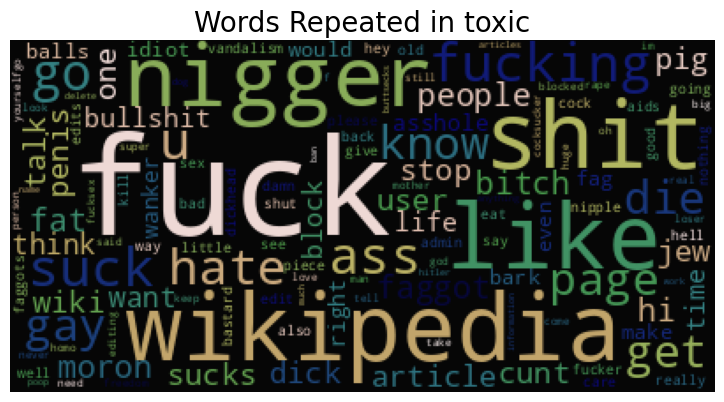

In [34]:
wordcloud(toxic_df,'toxic')

**2) Most Repeated (Severe Toxic)**

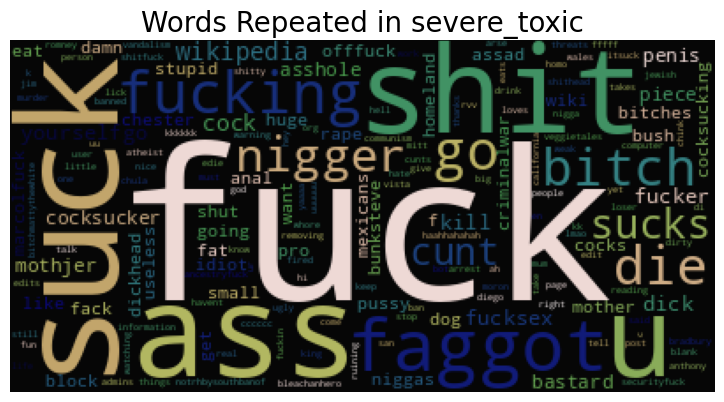

In [35]:
wordcloud(severe_toxic_df,'severe_toxic')

**3) Most Repeated words (obscene)**

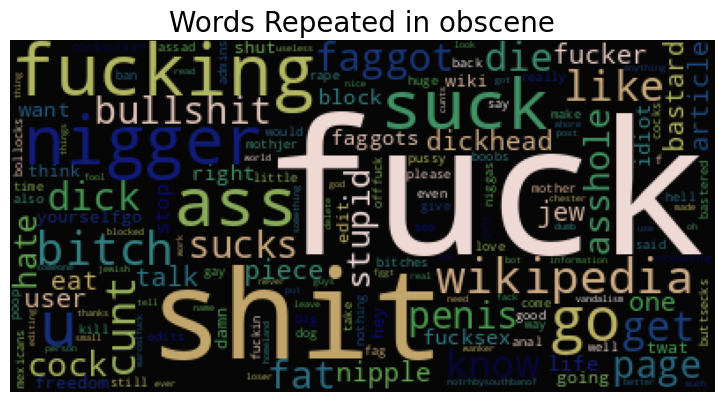

In [36]:
wordcloud(obscene_df,'obscene')

**4) Most Repeated threat words**

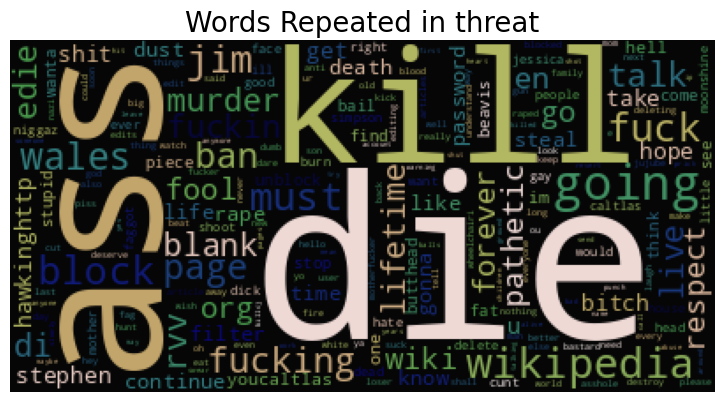

In [37]:
wordcloud(threat_df,'threat')

**5) Most Repeated Words (insult)**

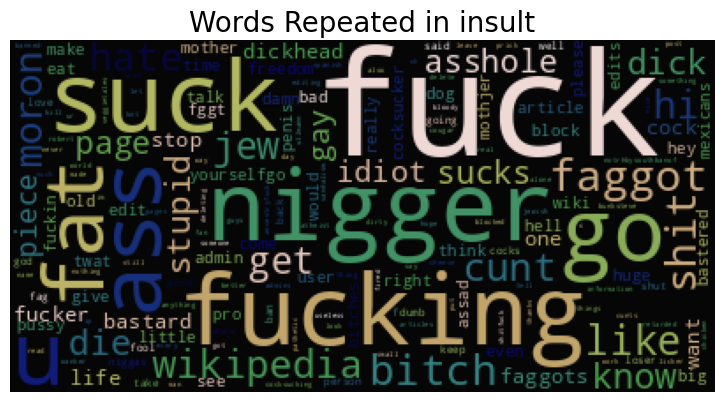

In [38]:
wordcloud(insult_df,'insult')

**6) Most Repeated Words in (identity hate)**

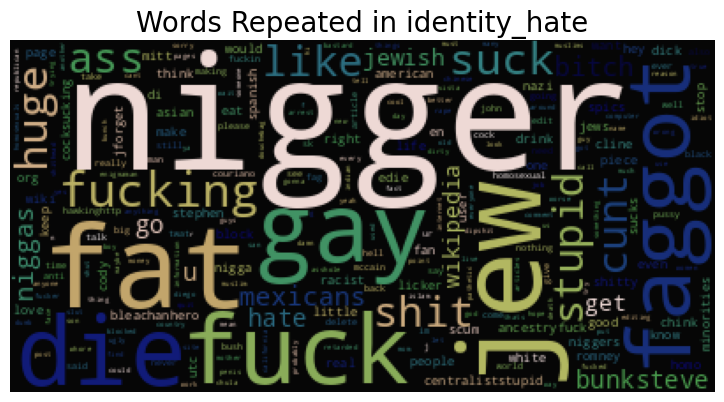

In [39]:
wordcloud(identity_hate_df,'identity_hate')

*** We notice that all labels contain almost the same words, which means they can be combined in one column**

# Balancing Data

*** We will select an equal percentage of 0 and 1 from all labels**

**1) Toxic_df**

In [40]:
toxic_df['toxic'].value_counts()

toxic
0    144277
1     15294
Name: count, dtype: int64

In [41]:
Toxic_comment_balanced_1 = toxic_df[toxic_df['toxic'] == 1].iloc[0:15294,:]
# Selecting only 15294 toxic comments 
Toxic_comment_balanced_0 = toxic_df[toxic_df['toxic'] == 0].iloc[0:15294,:]
# Selecting only 15294 non toxic comments 

In [42]:
Toxic_comment_balanced_1.shape , Toxic_comment_balanced_0.shape



((15294, 3), (15294, 3))

In [43]:
Toxic_comment_balanced=pd.concat([Toxic_comment_balanced_1,Toxic_comment_balanced_0])
## concatenating toxic and non toxic comments

In [44]:
Toxic_comment_balanced['toxic'].value_counts()

toxic
1    15294
0    15294
Name: count, dtype: int64

*** we will do these steps with all labels**

**2) severe_toxic df**

In [45]:
severe_toxic_df['severe_toxic'].value_counts()


severe_toxic
0    157976
1      1595
Name: count, dtype: int64

In [46]:
Severe_toxic_comment_df_1 = severe_toxic_df[severe_toxic_df['severe_toxic'] == 1].iloc[0:1595,:]
Severe_toxic_comment_df_0 = severe_toxic_df[severe_toxic_df['severe_toxic'] == 0].iloc[0:1595,:]


In [47]:
Severe_toxic_comment_balanced=pd.concat([Severe_toxic_comment_df_1,Severe_toxic_comment_df_0])


In [48]:
Severe_toxic_comment_balanced['severe_toxic'].value_counts() 


severe_toxic
1    1595
0    1595
Name: count, dtype: int64

**3) obscene_df**

In [49]:
obscene_df['obscene'].value_counts()

obscene
0    151122
1      8449
Name: count, dtype: int64

In [50]:
obscene_comment_df_1 = obscene_df[obscene_df['obscene'] == 1].iloc[0:8449,:]
Obscene_comment_df_0 = obscene_df[obscene_df['obscene'] == 0].iloc[0:8449,:] 

In [51]:
obscene_comment_balanced = pd.concat([obscene_comment_df_1,Obscene_comment_df_0])

In [52]:
obscene_comment_balanced['obscene'].value_counts()

obscene
1    8449
0    8449
Name: count, dtype: int64

**4)Threat_df**

In [53]:
threat_df['threat'].value_counts()

threat
0    159093
1       478
Name: count, dtype: int64

In [54]:
threat_comment_df_1 = threat_df[threat_df['threat'] == 1].iloc[0:478,:]
threat_comment_df_0 = threat_df[threat_df['threat'] == 0].iloc[0:478,:]


In [55]:
threat_comment_balanced = pd.concat([threat_comment_df_1,threat_comment_df_0])

In [56]:
threat_comment_balanced['threat'].value_counts()

threat
1    478
0    478
Name: count, dtype: int64

**5) insult_df**

In [57]:
insult_df['insult'].value_counts()

insult
0    151694
1      7877
Name: count, dtype: int64

In [58]:
insult_comment_df_1 = insult_df[insult_df['insult'] == 1].iloc[0:7877,:]
insult_comment_df_0 = insult_df[insult_df['insult'] == 0].iloc[0:7877,:]


In [59]:
insulting_comment_balanced = pd.concat([insult_comment_df_1,insult_comment_df_0])

In [60]:
insulting_comment_balanced['insult'].value_counts()

insult
1    7877
0    7877
Name: count, dtype: int64

**6) identity_hate_df**

In [61]:
identity_hate_df['identity_hate'].value_counts()

identity_hate
0    158166
1      1405
Name: count, dtype: int64

In [62]:
identity_hate_comment_df_1 = identity_hate_df[identity_hate_df['identity_hate'] == 1].iloc[0:1405,:]
identity_hate_comment_df_0 = identity_hate_df[identity_hate_df['identity_hate'] == 0].iloc[0:1405,:]


In [63]:
identity_hate_comment_balanced = pd.concat([identity_hate_comment_df_1,identity_hate_comment_df_0])

In [64]:
identity_hate_comment_balanced['identity_hate'].value_counts()

identity_hate
1    1405
0    1405
Name: count, dtype: int64

# Model Bulding

In [65]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk import ngrams
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier , RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [71]:
from sklearn.metrics import accuracy_score

def Bulding_model(dataframe,label,vectorizer,ngram):
    # Split the data into X and y data sets
    X = dataframe.comment_text
    y = dataframe[label]
    # Split our data into training and test data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
    # Using vectorizer and removing stopwords
    vector = vectorizer(ngram_range=(ngram), stop_words='english')
    # vectorizing x-train and x-test
    X_train = vector.fit_transform(X_train) 
    X_test = vector.transform(X_test)
    
    ## Machine learning models   
    
    #1 Logistic regression
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    lr_accuracy = accuracy_score(y_test, lr.predict(X_test))
    
    #2 GradientBoostingClassifier
    GBC = GradientBoostingClassifier()
    GBC.fit(X_train, y_train)
    gbc_accuracy = accuracy_score(y_test, GBC.predict(X_test))
    
    #3 RandomForestClassifier
    RFC = RandomForestClassifier()
    RFC.fit(X_train, y_train)
    rfc_accuracy = accuracy_score(y_test, RFC.predict(X_test))
    
    #4 LinearSVC
    SVC = LinearSVC()
    SVC.fit(X_train, y_train)
    svc_accuracy = accuracy_score(y_test, SVC.predict(X_test))
    
    #5 MultinomialNB
    MultiNB = MultinomialNB()
    MultiNB.fit(X_train, y_train)
    multinb_accuracy = accuracy_score(y_test, MultiNB.predict(X_test))
    
    ## Saving accuracy results into a list
    accuracies = [lr_accuracy, gbc_accuracy, rfc_accuracy, svc_accuracy, multinb_accuracy]
    
    ## Saving accuracy score results into a dataframe                     
    df_accuracy = pd.DataFrame({'Accuracy_Score': accuracies}, index=['Logistic Regression','Gradient Boosting', 'Random Forest', 'SVC', 'MultinomialNB'])  

    return df_accuracy


# Model Evaluation

1) **toxic**

In [73]:
toxic_evaluation = Bulding_model(Toxic_comment_balanced,'toxic',TfidfVectorizer, (1,1))
toxic_evaluation


,Accuracy_Score
Logistic Regression,0.888199
Gradient Boosting,0.817478
Random Forest,0.862918
SVC,0.897352
MultinomialNB,0.882532


**2) Severe_toxic**

In [75]:
Severe_toxic_evaluation = Bulding_model(Severe_toxic_comment_balanced,'severe_toxic',TfidfVectorizer, (1,1))
Severe_toxic_evaluation

,Accuracy_Score
Logistic Regression,0.942529
Gradient Boosting,0.909091
Random Forest,0.947753
SVC,0.939394
MultinomialNB,0.931034


**3) Obscene**

In [76]:
obscene_evaluation = Bulding_model(obscene_comment_balanced,'obscene',TfidfVectorizer, (1,1))
obscene_evaluation

,Accuracy_Score
Logistic Regression,0.919527
Gradient Boosting,0.880079
Random Forest,0.910848
SVC,0.931361
MultinomialNB,0.897239


**4) Threat**

In [77]:
threat_evaluation =  Bulding_model(threat_comment_balanced,'threat',TfidfVectorizer, (1,1))
threat_evaluation

,Accuracy_Score
Logistic Regression,0.905923
Gradient Boosting,0.874564
Random Forest,0.916376
SVC,0.902439
MultinomialNB,0.902439


**5) Insult**

In [78]:
insult_evaluation =  Bulding_model(insulting_comment_balanced,'insult',TfidfVectorizer, (1,1))
insult_evaluation

,Accuracy_Score
Logistic Regression,0.908610
Gradient Boosting,0.859107
Random Forest,0.896763
SVC,0.914110
MultinomialNB,0.901840


**6) Identity_Hate**

In [79]:
identity_hate_evaluation =  Bulding_model(identity_hate_comment_balanced,'identity_hate',TfidfVectorizer, (1,1))
identity_hate_evaluation

,Accuracy_Score
Logistic Regression,0.909846
Gradient Boosting,0.870700
Random Forest,0.907473
SVC,0.900356
MultinomialNB,0.902728


*** SVC and random forest were the best in the most of labels**

# Thank You